# **Visualização dos dados com Pandas**

A biblioteca pandas é integrada à biblioteca matplotlib. Nessa situação, podemos utilizá-la para observar, graficamente, o comportamento dos dados. 

        DataFrame.plot()

In [24]:
import pandas as pd 

# Importação dos dados 
sell = pd.read_csv(r'Contoso - Vendas  - 2017.csv', sep=';')
products = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';')
stores = pd.read_csv(r'Contoso - Lojas.csv', sep=';')
client = pd.read_csv(r'Contoso - Clientes.csv', sep=';')
promotions = pd.read_csv(r'Contoso - Promocoes.csv', sep=';')

#Modificação das bases de dados
products = products[['ID Produto', 'Nome do Produto']]
stores = stores[['ID Loja', 'Nome da Loja']]
client = client[['ID Cliente','E-mail']]
promotions = promotions[['ID Promocao', 'Percentual Desconto']]

#Merge das informações
sell = sell.merge(products, on = 'ID Produto')
sell = sell.merge(stores, on = 'ID Loja')
sell = sell.merge(client, on = 'ID Cliente')
sell = sell.merge(promotions, on = 'ID Promocao')


sell = sell.rename(columns={'E-mail': 'E-mail dos clientes'})
display(sell)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail dos clientes,Percentual Desconto
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp,"0,05"
1,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp,"0,05"
2,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp,"0,05"
3,26350,12/01/2017,18/01/2017,6,21,568,2,6825,9,0,Proseware Projector 480p DLP12 Silver,Loja Contoso Wheat Ridge,rbrumfieldmy@ameblo.jp,"0,05"
4,169169,11/03/2017,14/03/2017,3,22,437,2,21344,27,0,Adventure Works Desktop PC1.80 ED182 White,Loja Contoso Westminster,makayla3@adventure-works.com,"0,05"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,160497,07/03/2017,07/03/2017,0,231,1553,8,39031,12,0,The Phone Company PDA GPS Phone 3.5 inch M910 ...,Loja Contoso Hofheim,xavier39@adventure-works.com,"0,07"
980638,259187,14/04/2017,16/04/2017,2,236,128,8,37934,6,0,"Adventure Works 19"" Color Digital TV E35 Brown",Loja Contoso Baumholder,kathryn13@adventure-works.com,"0,07"
980639,129797,23/02/2017,23/02/2017,0,248,722,8,835,12,0,Proseware Professional Quality Plain-Paper Fax...,Loja Contoso Valletta,nlodgen6@paginegialle.it,"0,07"
980640,133440,24/02/2017,24/02/2017,0,218,1381,8,38801,12,0,Contoso Waterproof Accessory Handset and Charg...,Loja Contoso Toulouse,megan17@adventure-works.com,"0,07"


## **Desafio** 

A empresa deseja saber quais clientes mais compraram. 

        Contar quantas vezes cada cliente comprou. 
        DataFrame['coluna de referência'].values_counts()
        
**Observação:** A função usará os elementos de tal coluna para contabilizar. Ou seja, em quantas linhas cada um dos valores aparecem. 

*Cada linha representa uma compra*

In [25]:
frequency_client_buy = sell['E-mail dos clientes'].value_counts()

### **Visualizando tais clientes de forma gráfica**

São 38907 clientes, logo é de desejo visualizar somente os 5 maiores compradores. 

**Observação: Os gráficos não saem muito bonitos, um conselho é utilizar o matplotlib**

<AxesSubplot:>

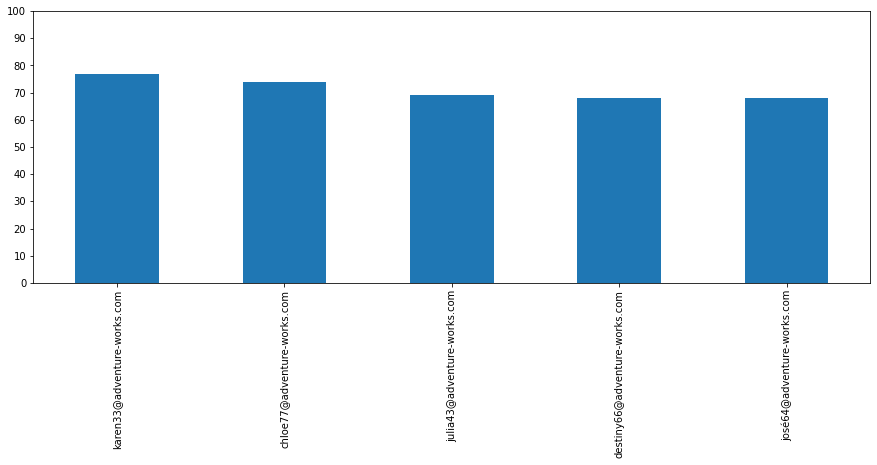

In [26]:
frequency_client_buy[:5].plot(figsize=(15,5), kind='bar',yticks = range(0, 110, 10))

# **Groupby()**

Suponhamos que deseja- se saber o total de vendas de cada loja. 

Nesse caso, não podemos utilizar *.value_counts()* pois essa função contaria a quantidade de vezes que cada loja aparece. Mas isso não é significado de vendas pois a venda total representa valores arrecadados na compra dos produtos em cada loja. 

### **Solução**

Construir uma tabela com subconjuntos e somar as vendas (contidas na coluna 'Quantidade Vendida'). 

------------
**Síntaxe**

        DataFrame.goupby('Coluna(s) que queremos realizar o agrupamento)[coluna cujos elementos sofrerão com a operação].operação()

In [33]:
sell_of_each_store = sell.groupby('Nome da Loja').sum()
sell_of_each_store = sell_of_each_store[['Quantidade Vendida']]
display(sell_of_each_store)

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


In [34]:
type(sell_of_each_store)

pandas.core.frame.DataFrame

In [37]:
#Há duas colunas, um com nome loja e o outro com a quantidade vendida. 
#Precisamos definir atrvés de qual coluna iremos realizar a ordenação.

sell_of_each_store = sell_of_each_store.sort_values('Quantidade Vendida', ascending= False)
display(sell_of_each_store)

,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176
...,...
Loja Contoso Berlin,379
Loja Contoso Paterson,371
Loja Contoso Marseille,370
